In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the dataset
data = pd.read_csv('data/admission_predict.csv')
df = data

## Exploring the dataset

In [3]:
# Returns number of rows and columns of the dataset
df.shape

(500, 9)

In [4]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# Returns the first x number of rows when tail(num). Without a number it returns 5
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [6]:
# Returns an object with all of the column headers
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [9]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [10]:
# Returns true for a column having null values, else false
df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [11]:
# Renaming the columns with appropriate names
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'Chance of Admit ': 'Probability','University Rating': 'University_Rating', 'LOR ': 'LOR'})
df.head()

,Serial No.,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Data Visualization

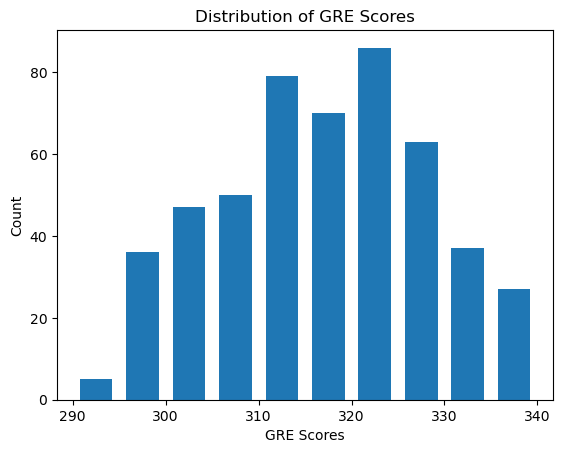

In [12]:
# Visualizing the feature GRE
fig = plt.hist(df['GRE'], rwidth=0.7)
plt.title("Distribution of GRE Scores")
plt.xlabel('GRE Scores')
plt.ylabel('Count')
plt.show()

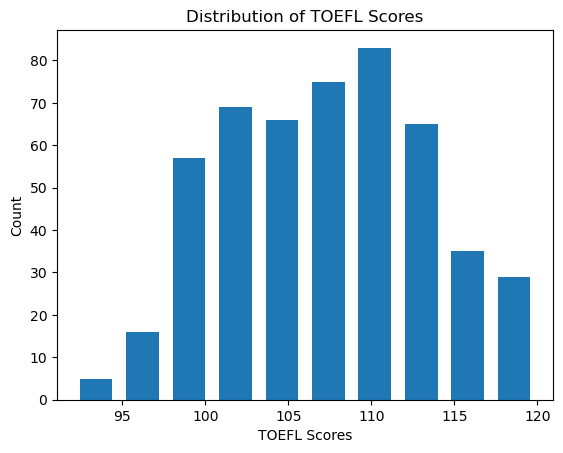

In [13]:
# Visualizing the feature TOEFL
fig = plt.hist(df['TOEFL'], rwidth=0.7)
plt.title('Distribution of TOEFL Scores')
plt.xlabel('TOEFL Scores')
plt.ylabel('Count')
plt.show()

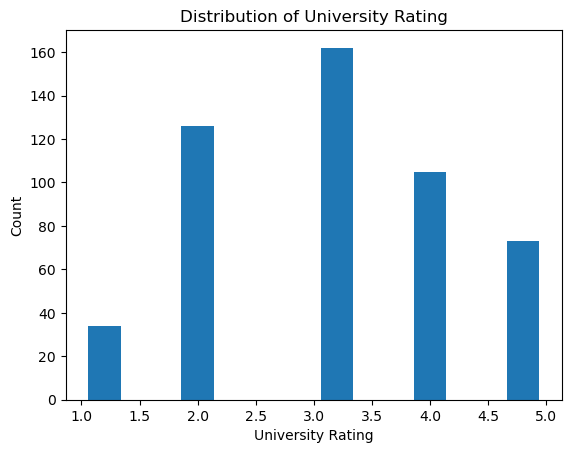

In [14]:
# Visualizing the feature TOEFL
fig = plt.hist(df['University_Rating'], rwidth=0.7)
plt.title('Distribution of University Rating')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

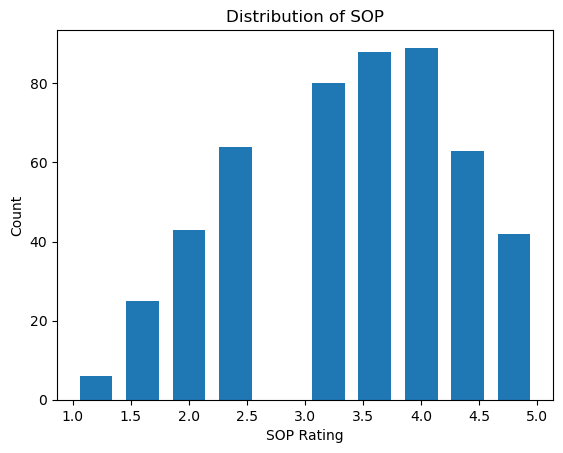

In [15]:
# Visualizing the feature TOEFL
fig = plt.hist(df['SOP'], rwidth=0.7)
plt.title('Distribution of SOP')
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show()

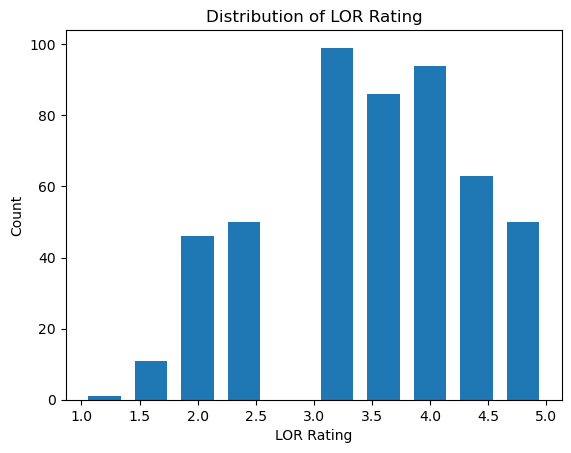

In [16]:
# Visualizing the feature TOEFL
fig = plt.hist(df['LOR'], rwidth=0.7)
plt.title('Distribution of LOR Rating')
plt.xlabel('LOR Rating')
plt.ylabel('Count')
plt.show()

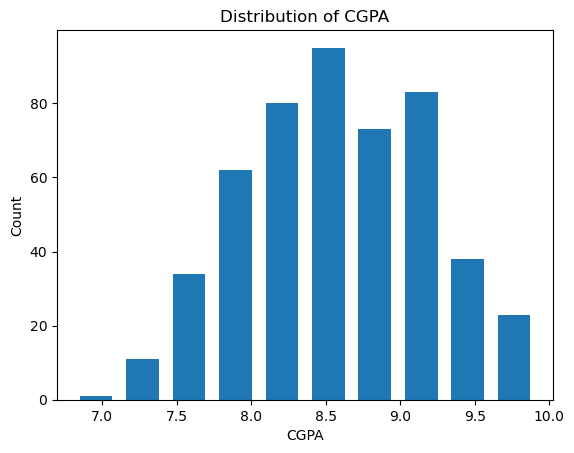

In [17]:
# Visualizing the feature TOEFL
fig = plt.hist(df['CGPA'], rwidth=0.7)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

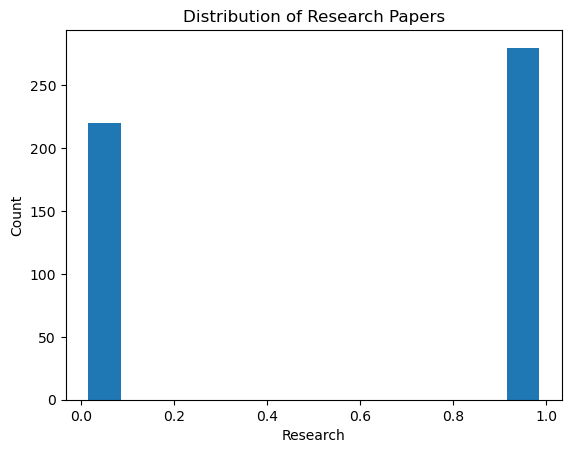

In [18]:
# Visualizing the feature TOEFL
fig = plt.hist(df['Research'], rwidth=0.7)
plt.title('Distribution of Research Papers')
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

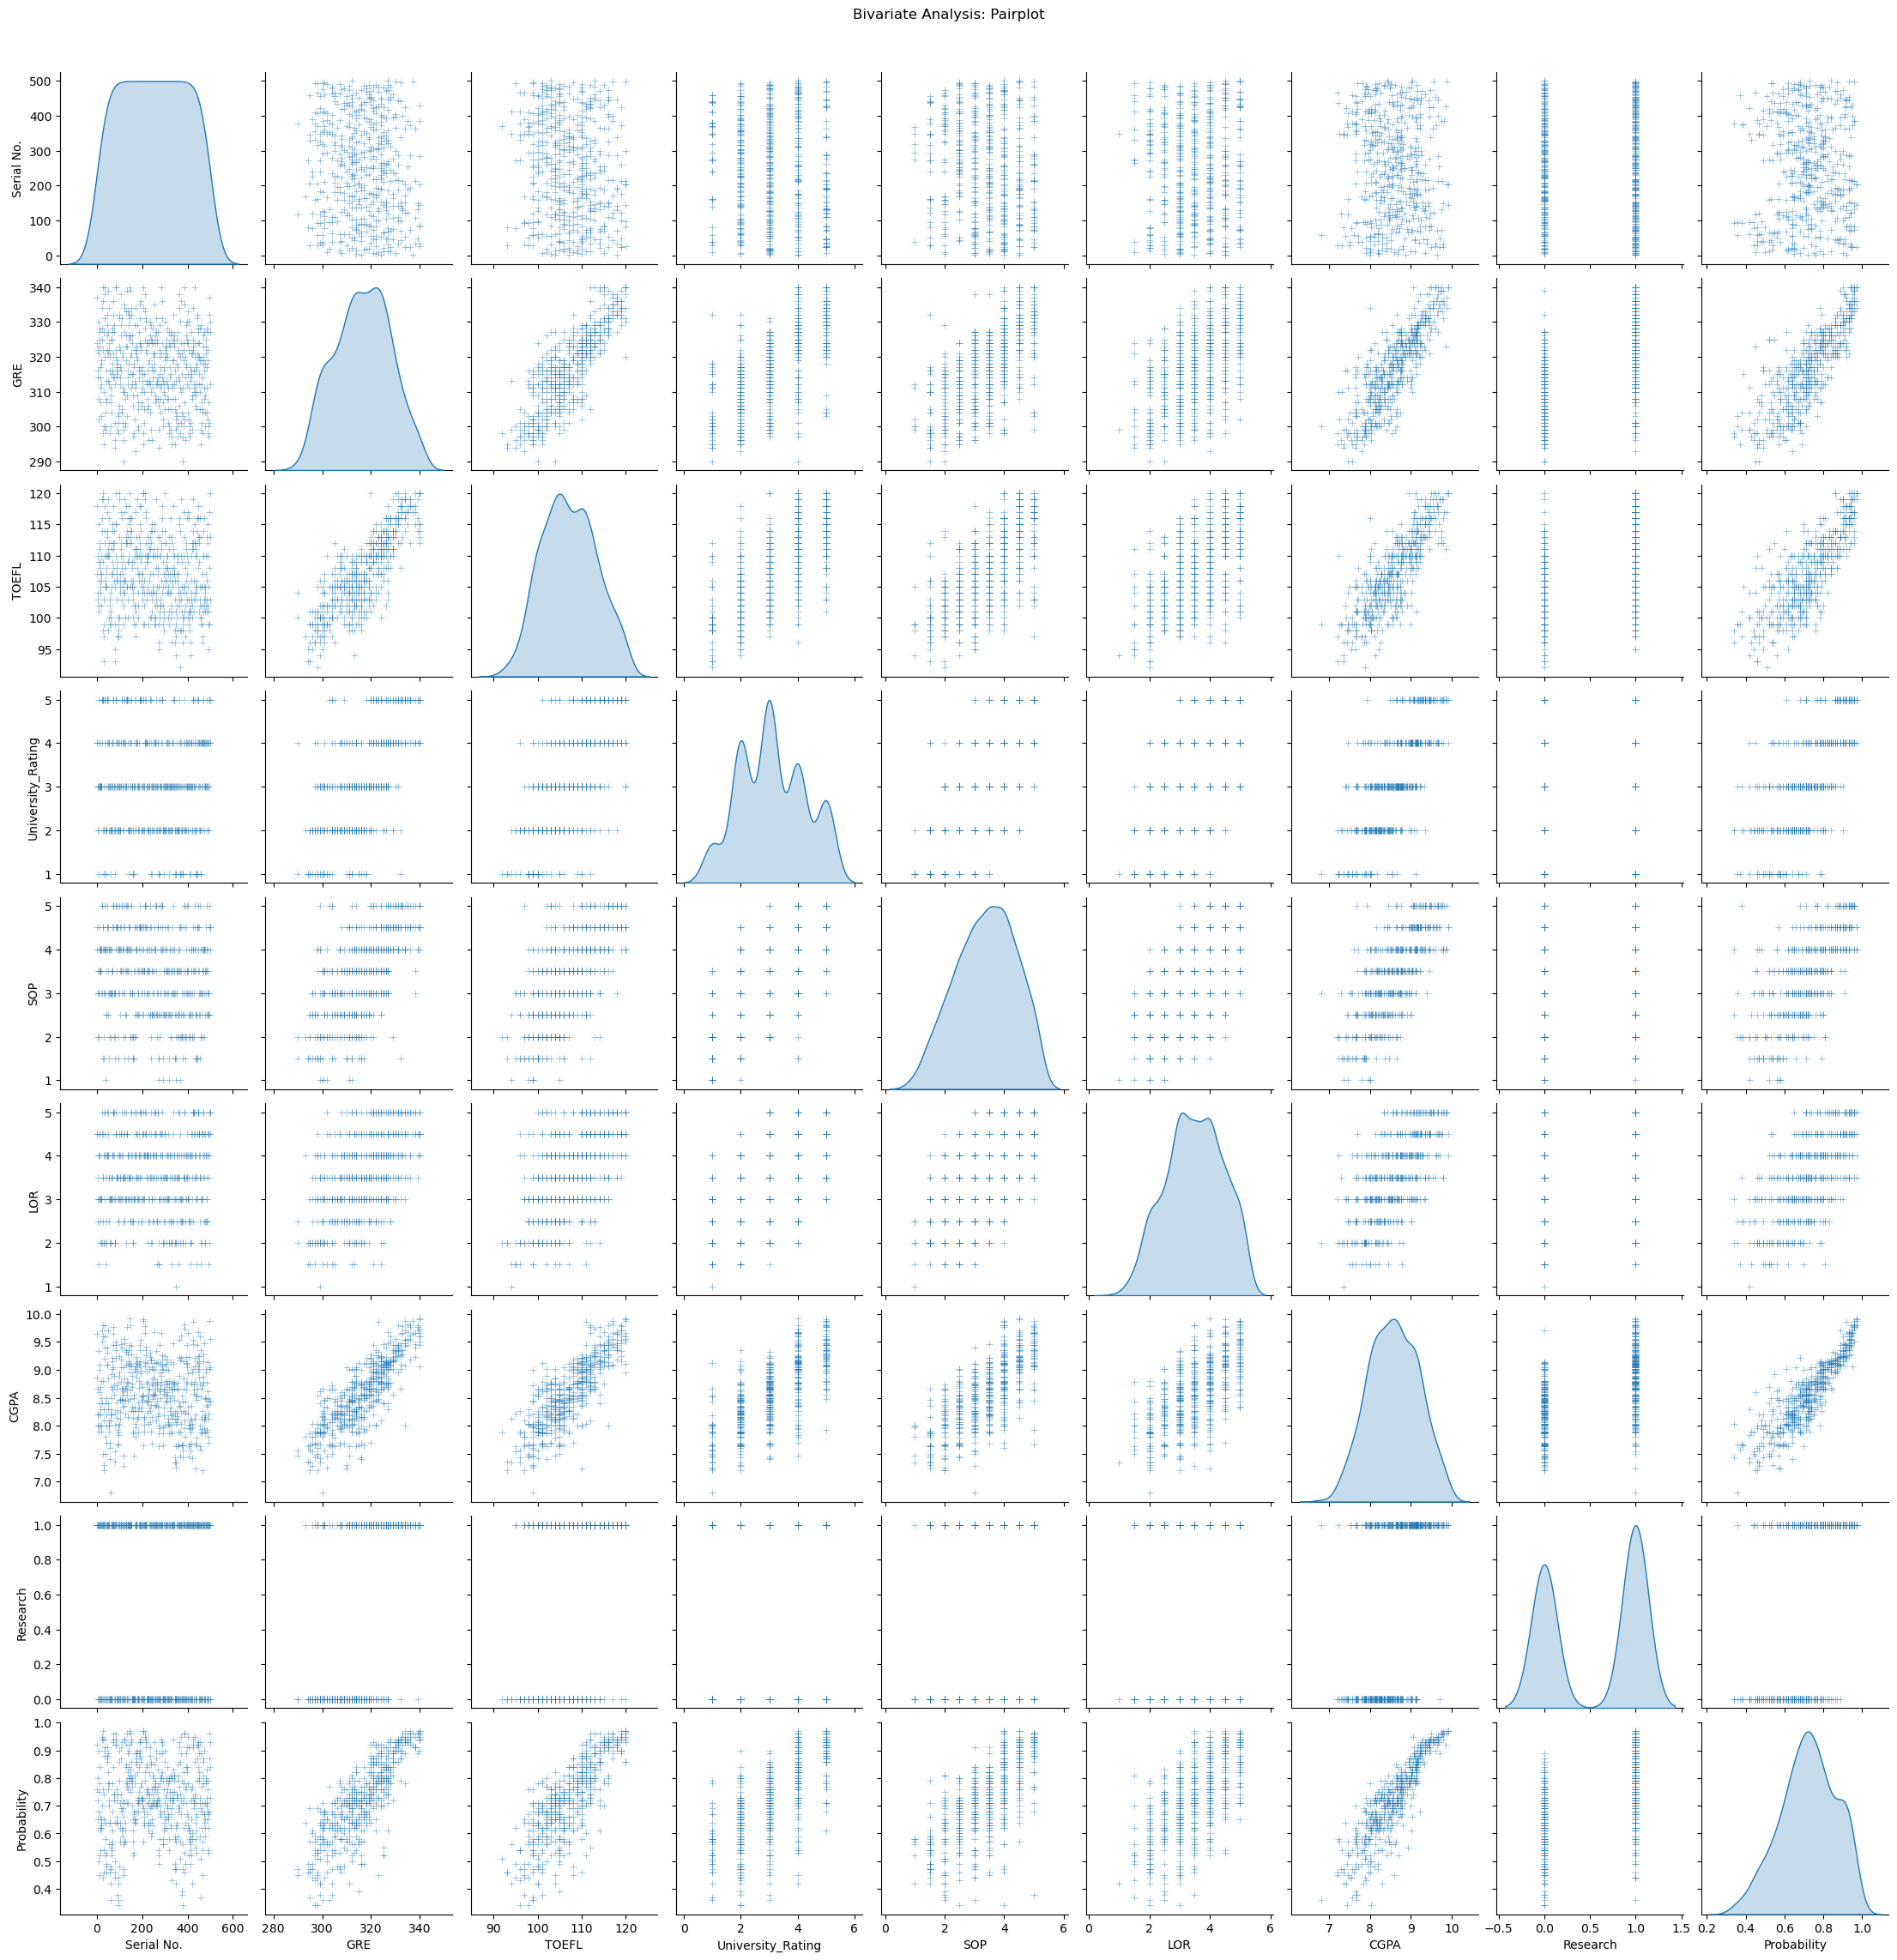

In [19]:
# Bivariate Analysis: Scatter plot for numerical variables
sns.pairplot(df, diag_kind='kde', markers="+", plot_kws={'alpha':0.6})
plt.suptitle("Bivariate Analysis: Pairplot", y=1.02)
plt.show()

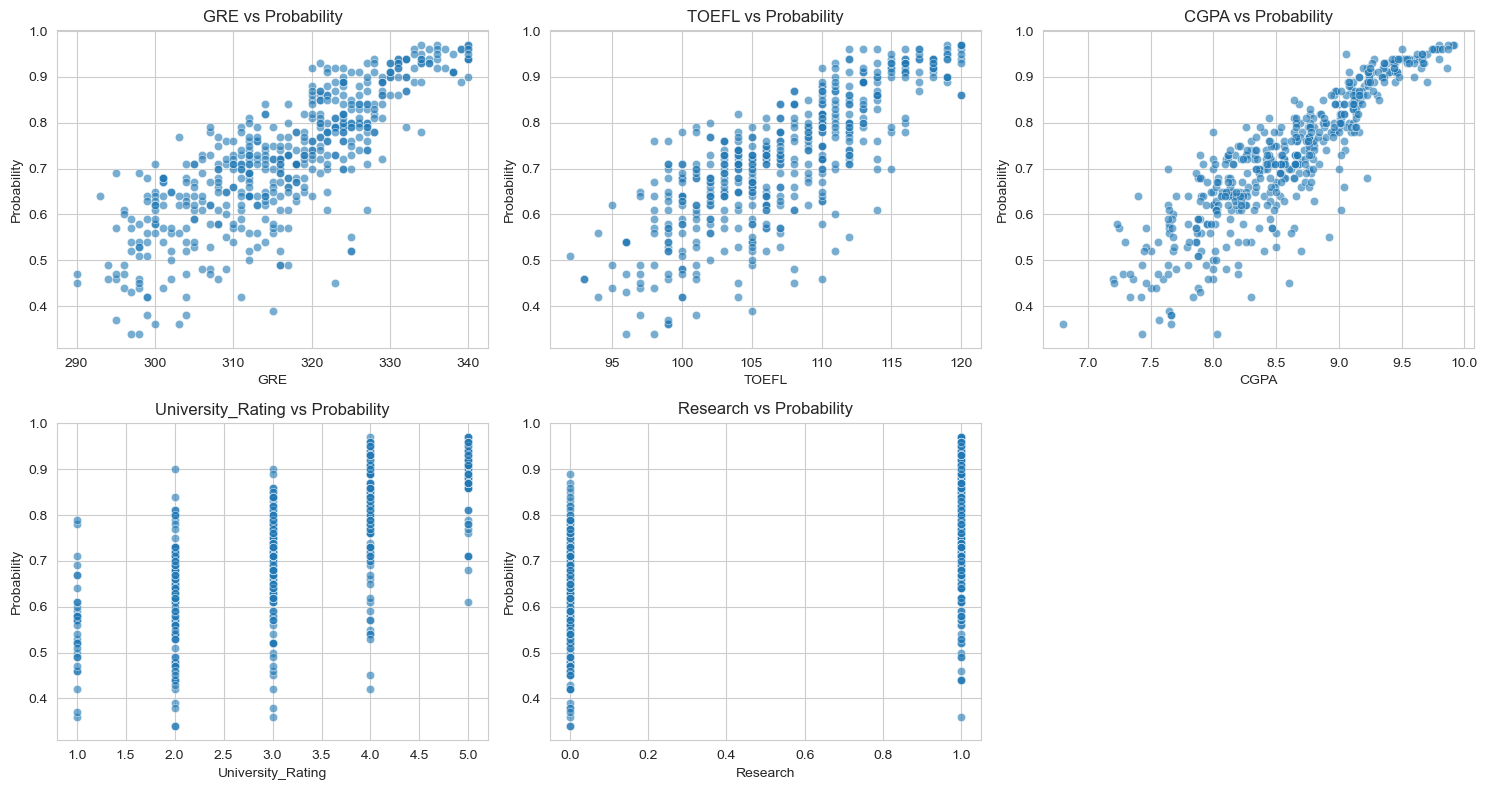

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

In [20]:

# Set the style for better visuals
sns.set_style("whitegrid")

# Define important features
important_features = ['GRE', 'TOEFL', 'CGPA', 'University_Rating', 'Research']
target_variable = 'Probability'

# Bivariate Analysis using Scatter plots
plt.figure(figsize=(15, 8))

for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df[target_variable], alpha=0.6)
    plt.title(f'{feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)

plt.tight_layout()
plt.show()

# Bivariate Analysis using Boxplots for categorical variables
plt.figure(figsize=(10, 4))

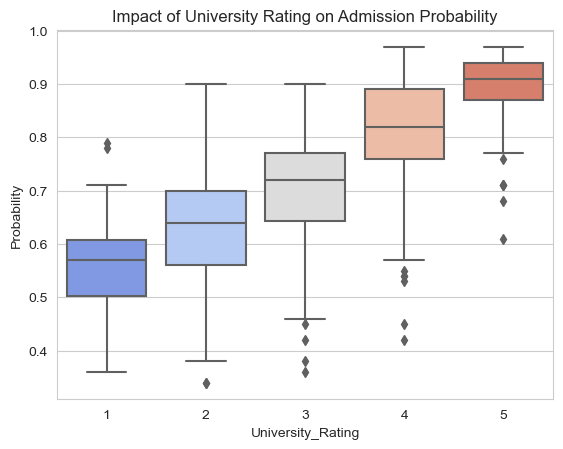

In [21]:

sns.boxplot(x='University_Rating', y=target_variable, data=df, palette="coolwarm")
plt.title("Impact of University Rating on Admission Probability")
plt.show()


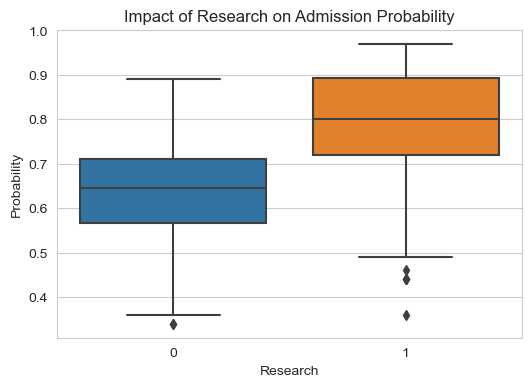

In [22]:
# Boxplot to analyze categorical variable 'Research' against 'Probability'
plt.figure(figsize=(6, 4))
sns.boxplot(x='Research', y='Probability', data=df)
plt.title("Impact of Research on Admission Probability")
plt.show()


## Data Cleaning

In [23]:
# Removing the serial no, column
df.drop('Serial No.', axis='columns', inplace=True)
df.head()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


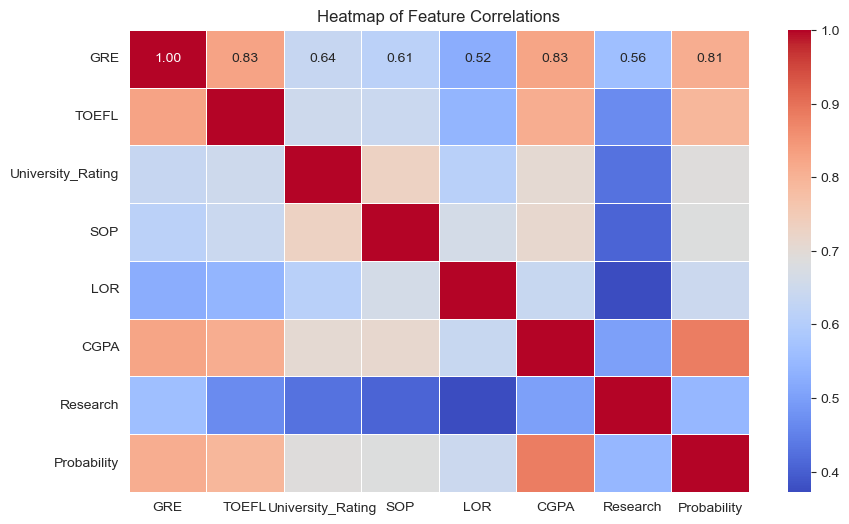

In [24]:
# Multivariate Analysis: Heatmap of Correlation Matrix
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

### **Findings from the Correlation Matrix Analysis**  

The correlation matrix provides insights into how different features relate to each other and to the target variable (`Probability`). Let's break it down:

---

### **1. Strongest Correlations with `Probability` (Target Variable)**  
These features have the highest impact on `Probability`:  
- **CGPA (`0.882`):** The highest correlation with `Probability`, indicating that a higher CGPA strongly increases the chances of admission.  
- **GRE (`0.810`):** A strong positive correlation, meaning a higher GRE score significantly increases the probability of admission.  
- **TOEFL (`0.792`):** Also a strong correlation, suggesting that TOEFL scores contribute to the admission chances.  
- **University Rating (`0.690`):** Moderate-to-strong correlation, meaning applicants from higher-rated universities have better chances.  
- **SOP (`0.684`) & LOR (`0.645`):** These have a moderate correlation, showing that good Statements of Purpose (SOPs) and strong Letters of Recommendation (LORs) can improve admission chances.  
- **Research (`0.545`):** A moderate correlation, indicating that research experience helps but is not as influential as CGPA, GRE, or TOEFL.  

---

### **2. Feature Interrelationships**  
- **GRE and TOEFL (`0.827`)**: Strong correlation, meaning students who score high in GRE often score high in TOEFL.  
- **CGPA and GRE (`0.825`)**: High correlation suggests students with high CGPA also tend to score well in GRE.  
- **CGPA and TOEFL (`0.810`)**: Similarly, students with high CGPA tend to have higher TOEFL scores.  
- **SOP and University Rating (`0.728`)**: Universities may rate applicants higher if they have strong SOPs.  
- **LOR and SOP (`0.664`)**: A reasonable correlation, suggesting that applicants with strong SOPs also tend to receive strong letters of recommendation.  

---

### **3. Insights for Admission Prediction**  
- **CGPA, GRE, and TOEFL are the most crucial factors for predicting `Probability`.**  
- **Research has a moderate impact**, meaning it's helpful but not as critical as academic performance.  
- **SOP, LOR, and University Rating have a moderate impact, suggesting that strong applications can boost chances but may not override academic performance.**  

---



In [25]:
# Replacing the 0 values from ['GRE','TOEFL','University Rating','SOP','LOR','CGPA'] by NaN
df_copy = df.copy(deep=True)
df_copy[['GRE','TOEFL','University_Rating','SOP','LOR','CGPA']] = df_copy[['GRE','TOEFL','University_Rating','SOP','LOR','CGPA']].replace(0, np.NaN)
df_copy.isnull().sum()

GRE                  0
TOEFL                0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

## Model Building

In [26]:
# Splitting the dataset in features and label
X = df_copy.drop('Probability', axis='columns')
y = df_copy['Probability']

In [27]:
X.head()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [28]:

# Function to find the best model
def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {}
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': np.linspace(0.1, 2, 5),  # Expanded range
                'selection': ['random', 'cyclic']
            }
        },
        
        'svr': {
            'model': SVR(),
            'parameters': {
                'kernel': ['linear', 'rbf'],  # Added kernels
                'C': [0.1, 1, 10],
                'gamma': ['auto', 'scale']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(random_state=42),
            'parameters': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 5, 10]
            }
        },
        
        'random_forest': {
            'model': RandomForestRegressor(random_state=42),
            'parameters': {
                'n_estimators': [10, 50, 100],
                'max_depth': [None, 5, 10]
            }
        },
        
        'knn': {
            'model': KNeighborsRegressor(),
            'parameters': {
                'n_neighbors': [2, 5, 10, 20],
                'weights': ['uniform', 'distance']
            }
        }
    }
    
    scores = []
    
    print("Finding the best model...")

    for model_name, model_params in tqdm(models.items(), desc="Model Selection Progress"):
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, scoring='r2', return_train_score=False)
        gs.fit(X, y)
        
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
    
    return pd.DataFrame(scores).sort_values(by="score", ascending=False)

find_best_model(X, y)

Finding the best model...


Model Selection Progress: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]


,model,best_parameters,score
0,linear_regression,{},0.810802
4,random_forest,"{'max_depth': 5, 'n_estimators': 50}",0.784615
2,svr,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.782363
5,knn,"{'n_neighbors': 20, 'weights': 'distance'}",0.724632
3,decision_tree,"{'criterion': 'squared_error', 'max_depth': 5,...",0.697627
1,lasso,"{'alpha': 0.1, 'selection': 'random'}",0.670060


#### Since the Linear Regression algorithm has the highest accuracy, the model selected for this problem is Linear Regression.

In [30]:

# Standardizing the features (recommended for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE = sqrt(MSE)

# Printing all evaluation metrics
print(f" R² Score: {r2:.4f}")
print(f" Mean Absolute Error (MAE): {mae:.4f}")
print(f" Mean Squared Error (MSE): {mse:.4f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.4f}")

 R² Score: 0.8215
 Mean Absolute Error (MAE): 0.0417
 Mean Squared Error (MSE): 0.0029
 Root Mean Squared Error (RMSE): 0.0540


The model explains 82.15% of the variance in Probability, with an average prediction error of 4.17% (MAE) and 5.4% (RMSE), indicating strong predictive performance but with room for improvement.